In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer


In [22]:
d=load_breast_cancer()

df=pd.DataFrame(data=d["data"],columns=d["feature_names"])
df["Target"]=d["target"]
df.head()




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [32]:
scaler.fit(df.drop("Target",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_data=scaler.transform(df.drop("Target",axis=1))

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca=PCA(n_components=2)

In [34]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
x_pca=pca.transform(scaled_data)

In [36]:
scaled_data.shape

(569, 30)

In [37]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'second pc')

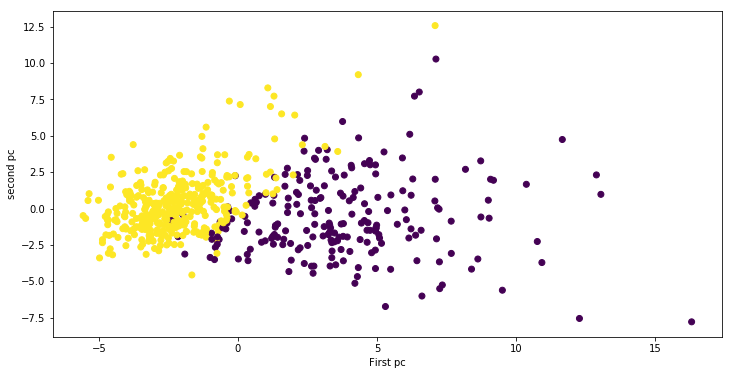

In [46]:
plt.figure(figsize=(12,6))
a=plt.scatter(x_pca[:,0],x_pca[:,1],c=df["Target"])
plt.xlabel("First pc")
plt.ylabel("second pc")
plt.legend()


In [48]:
df_comp=pd.DataFrame(pca.components_,columns=d["feature_names"])

In [49]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [ ]:
sns.heatmap(df_comp,cmap="plasma")